In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [3]:
no_test = 5000000

# rotated, 336 qubits (42 each) d = 4
p_error = [0.014644272334600528,0.02730078059650798,0.042658494296205385,0.054622653953307565,0.06661371122423243,0.08049840741544922,0.09229347110957253,0.10591757080192399,0.11726689345830865,0.13269648820150737]
# rotated, 504 qubits (63 each) d = 5
# p_error = [0.002197085202675031,0.004493928356958499,0.0065831748181789385,0.008810377666911284,0.011178663844486403,0.013296230353607719,0.015650696144952625,0.018169767922420532,0.0207074682815529,0.022541402893564877]

p_log = [1 - i for i in p_error]
ts = [10,20,30,40,50,60,70,80,90,100]
p_std_dev = [np.sqrt((p_error[i] * p_log[i]) / no_test) for i in range(len(p_error))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


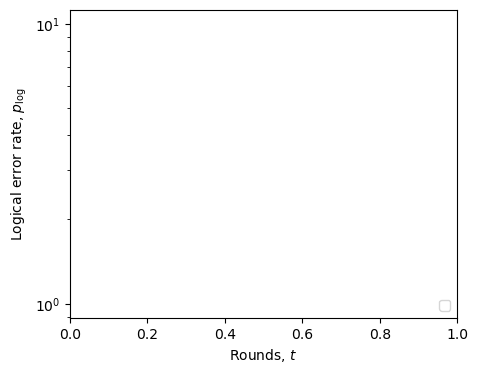

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

code = "12_3"

df = pd.read_csv(f'./{code}/mask_vs_synd_error_1.1.res')
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
# df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
guesses = []
params = []

def fun(x, a):
    return 1 - (1 - a)**x

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
tmp_df = df[(df['p_std_dev'] > 0)]

    # tmp_df_fit = df[(df['p_mask'] == j) & (df['algo'] >= 200)]
    # tmp_df_before = df[(df['p_mask'] == j) & (df['algo'] < 200) & (df['algo'] > 10)]

# ax.errorbar(tmp_df['t'], tmp_df['p_error'], tmp_df['p_std_dev'], fmt='o', label="Quasi-cyclic: [[72,8,d]] (288 qubits)")
# ax.errorbar(ts, p_error, p_std_dev, fmt='o', c='k', label="Surface code: [[336,8,4]]")

# popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),
#     sigma=tmp_df['p_std_dev'])
# xx = np.linspace(1, 100, 1000)
# yy = fun(xx, *popt)
# ax.plot(xx, yy, c='k')


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

# ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Logical error rate, $p_\log$')
ax.set_xlabel('Rounds, $t$')
plt.legend(loc='lower right')
# ax[1].set_xlabel('$p$')

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [3,2,1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

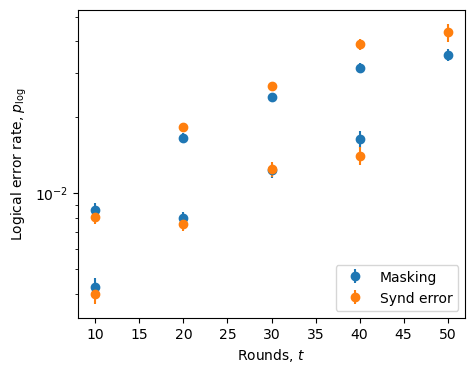

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

code = "12_3"

df = pd.read_csv(f'./{code}/mask_vs_synd_error_1.2.res')
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
# df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)
guesses = []
params = []

def fun(x, a):
    return 1 - (1 - a)**x

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
tmp_df2 = df[(df['p_std_dev'] > 0)]

    # tmp_df_fit = df[(df['p_mask'] == j) & (df['algo'] >= 200)]
    # tmp_df_before = df[(df['p_mask'] == j) & (df['algo'] < 200) & (df['algo'] > 10)]

ax.errorbar(tmp_df['t'], tmp_df['p_error'], tmp_df['p_std_dev'], fmt='o', label="Masking")
ax.errorbar(tmp_df2['t'], tmp_df2['p_error'], tmp_df2['p_std_dev'], fmt='o', label="Synd error")


# popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),
#     sigma=tmp_df['p_std_dev'])
# xx = np.linspace(1, 100, 1000)
# yy = fun(xx, *popt)
# ax.plot(xx, yy, c='k')


# ax.plot(np.linspace(0, 0.05, 100), np.linspace(1e-3, 50*1e-3, 100), c='k')
# ax[1].plot(np.linspace(1e-3,1e-2,100), np.linspace(1e-3, 1e-2, 100), c='k')

# ax.set_title('ISD with $p_0 = 0.001$')
# ax[1].set_title('SSF with $k=1$')
ax.legend(loc='lower right')
ax.set_yscale('log')
ax.set_ylabel('Logical error rate, $p_\log$')
ax.set_xlabel('Rounds, $t$')
plt.legend(loc='lower right')
# ax[1].set_xlabel('$p$')

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [3,2,1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])